In [ ]:
run svm_title.py

/home/M2015eliu/.pyenv/versions/anaconda2-4.1.1/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/M2015eliu/.pyenv/versions/anaconda2-4.1.1/lib/python2.7/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


('Reading english Data:', 5000)
('Reading english Data:', 5000)
Merging the English and Japanes news dataframe...
Drop the null line...
False    4995
True        5
Name: en_article, dtype: int64
0
No word: wrapup
No word: wrapup
No word: wrapup
No word: pares
No word: pares
No word: globals
No word: descends
No word: t.italia
No word: weekahead
No word: /weighs
No word: eyes
No word: techs
No word: suspends
No word: suspends
No word: suspends
No word: suspends
No word: redbook
No word: wrapup
No word: keeps
No word: subbed
1000
No word: toughens
No word: toughens
No word: edging
No word: eur/shr
No word: decemeber
No word: soupdate
No word: decemeber
No word: decemeber
No word: s.korean
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: sharpest
No word: soothes
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrap

In [6]:
		print "classification report of TRAINING data:"
		print(classification_report(y_train, y_train_predict))

		print "classification report of TEST data:"
		print(classification_report(y_test, y_test_predict))

classification report of TRAINING data:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      4000
        1.0       1.00      1.00      1.00      4000

avg / total       1.00      1.00      1.00      8000

classification report of TEST data:
             precision    recall  f1-score   support

        0.0       0.73      0.79      0.76      1000
        1.0       0.77      0.70      0.74      1000

avg / total       0.75      0.75      0.75      2000



In [14]:
def find_ranking(projection1, projection2, clf):
	sim_results = []
	rank_results = []

	# Iterate each of the ariticle from projection1 (999) as proj1
	# Calculate the simialrity of proj1 with all ariticles in projection2 (999)
	for i, proj1 in enumerate(projection1):
		# print "Find answer for doc.", i
		proj1_tile = np.tile(proj1, (len(projection2),1))
		features_test = np.concatenate((proj1_tile, projection2), axis=1)
		sim = clf.predict_proba(features_test)[:,1]
		rank = pd.Series(sim).rank(ascending = False)[i]
		sim_results.append(sim)
		rank_results.append(rank)
		print "Find answer for doc.", rank

	# sim_results contains 999*999 similairty matrix
	return sim_results, rank_results


In [15]:
sim_results_test1, rank_results_test2 = find_ranking(X_test_scaled[:1000,:200] ,X_test_scaled[:1000,200:], clf)

Find answer for doc. 36.0
Find answer for doc. 270.0
Find answer for doc. 19.0
Find answer for doc. 8.0
Find answer for doc. 33.0
Find answer for doc. 22.5
Find answer for doc. 13.5
Find answer for doc. 6.0
Find answer for doc. 119.0
Find answer for doc. 23.0
Find answer for doc. 2.0
Find answer for doc. 8.0
Find answer for doc. 3.5
Find answer for doc. 257.5
Find answer for doc. 1.0
Find answer for doc. 16.0
Find answer for doc. 3.0
Find answer for doc. 21.0
Find answer for doc. 4.0
Find answer for doc. 40.5
Find answer for doc. 12.5
Find answer for doc. 64.5
Find answer for doc. 64.5
Find answer for doc. 1.0
Find answer for doc. 1.0
Find answer for doc. 1.0
Find answer for doc. 11.0
Find answer for doc. 8.0
Find answer for doc. 3.0
Find answer for doc. 29.0
Find answer for doc. 12.0
Find answer for doc. 17.0
Find answer for doc. 14.0
Find answer for doc. 18.0
Find answer for doc. 16.5
Find answer for doc. 16.5
Find answer for doc. 16.5
Find answer for doc. 14.5
Find answer for doc. 3

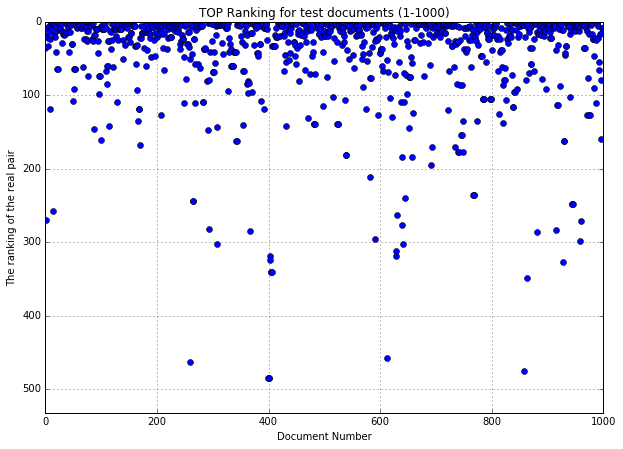

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['figure.figsize'] = (6.0, 2.0)
# matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.figsize'] = (10, 7)
plt.plot(rank_results_test2,'bo')
plt.title('TOP Ranking for test documents (1-1000)')
plt.xlabel('Document Number')
plt.ylabel('The ranking of the real pair')
# plt.ylim([1000,0])
plt.ylim([532,0.5])
plt.grid(True)
plt.savefig('top-test.eps', format='eps', dpi=1000)
plt.show()

In [17]:
pd.Series(rank_results_test2).describe()

count    1000.000000
mean       42.550000
std        77.352682
min         1.000000
25%         4.500000
50%        14.500000
75%        42.125000
max       581.500000
dtype: float64

In [23]:
print "TOP1", (pd.Series(rank_results_test2)<=1).sum()
print "TOP5", (pd.Series(rank_results_test2)<=5).sum()
print "TOP10", (pd.Series(rank_results_test2)<=10).sum()

TOP1 71
TOP5 292
TOP10 434


In [32]:
y_pred_svm = np.concatenate((y_test_proba[:1000, 0], y_test_proba[1000:, 0]), axis = 0)

In [33]:
y_pred_svm

array([ 0.6582921 ,  0.63066441,  0.63945968, ...,  0.63464541,
        0.65956287,  0.64395729])

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['figure.figsize'] = (6.0, 2.0)
# matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.figsize'] = (10, 7)
plt.plot(rank_results_test2,'bo')
plt.title('TOP Ranking for test documents (1-1000)')
plt.xlabel('Document Number')
plt.ylabel('The ranking of the real pair')
# plt.ylim([1000,0])
plt.ylim([532,0.5])
plt.grid(True)
plt.savefig('top-test.eps', format='eps', dpi=1000)
plt.show()

array([[ 0.6582921 ,  0.3417079 ],
       [ 0.63066441,  0.36933559],
       [ 0.63945968,  0.36054032],
       ..., 
       [ 0.63464541,  0.36535459],
       [ 0.65956287,  0.34043713],
       [ 0.64395729,  0.35604271]])

In [38]:
y_test_proba

array([[ 0.6582921 ,  0.3417079 ],
       [ 0.63066441,  0.36933559],
       [ 0.63945968,  0.36054032],
       ..., 
       [ 0.63464541,  0.36535459],
       [ 0.65956287,  0.34043713],
       [ 0.64395729,  0.35604271]])

In [40]:
X_test

array([[-0.03955241, -0.0001631 , -0.04501995, ...,  0.09645714,
        -0.03504182,  0.02975854],
       [ 0.01106302, -0.01305327, -0.02850406, ..., -0.05487785,
        -0.05260832,  0.00158552],
       [ 0.02568687,  0.06809914, -0.01204161, ..., -0.00800688,
        -0.03556793,  0.04402282],
       ..., 
       [-0.00772967, -0.0149869 , -0.05143024, ...,  0.0189511 ,
        -0.02020846, -0.01431365],
       [ 0.02283853, -0.02101873, -0.02809767, ..., -0.0021404 ,
        -0.05004645,  0.00692321],
       [ 0.07005622,  0.00198867, -0.02131847, ..., -0.00271247,
        -0.03884349,  0.03681538]])

In [39]:
clf.predict_proba(X_test)

array([[ 0.6582921 ,  0.3417079 ],
       [ 0.63066441,  0.36933559],
       [ 0.63945968,  0.36054032],
       ..., 
       [ 0.63464541,  0.36535459],
       [ 0.65956287,  0.34043713],
       [ 0.64395729,  0.35604271]])

In [42]:
clf.predict(X_test)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [41]:
clf.predict_proba(X_train)

array([[ 0.62366021,  0.37633979],
       [ 0.62958117,  0.37041883],
       [ 0.67077187,  0.32922813],
       ..., 
       [ 0.61707025,  0.38292975],
       [ 0.62948134,  0.37051866],
       [ 0.62948089,  0.37051911]])

In [43]:
		y_test_predict = clf.predict(X_test_scaled)
		y_train_predict = clf.predict(X_scaled)
		print clf
		print "classification report of TRAINING data:"
		print(classification_report(y_train, y_train_predict))

		print "classification report of TEST data:"
		print(classification_report(y_test, y_test_predict))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
classification report of TRAINING data:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      4000
        1.0       1.00      1.00      1.00      4000

avg / total       1.00      1.00      1.00      8000

classification report of TEST data:
             precision    recall  f1-score   support

        0.0       0.73      0.79      0.76      1000
        1.0       0.77      0.70      0.74      1000

avg / total       0.75      0.75      0.75      2000



In [45]:
clf.predict_proba(X_test_scaled)

array([[  5.38467915e-01,   4.61532085e-01],
       [  8.66816910e-01,   1.33183090e-01],
       [  8.30618465e-01,   1.69381535e-01],
       ..., 
       [  8.17841259e-01,   1.82158741e-01],
       [  9.80119791e-01,   1.98802090e-02],
       [  9.99931591e-01,   6.84088431e-05]])

In [1]:
run svm_title.py

/home/M2015eliu/.pyenv/versions/anaconda2-4.1.1/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/M2015eliu/.pyenv/versions/anaconda2-4.1.1/lib/python2.7/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


('Reading english Data:', 5000)
('Reading english Data:', 5000)
Merging the English and Japanes news dataframe...
Drop the null line...
False    4995
True        5
Name: en_article, dtype: int64
0
No word: wrapup
No word: wrapup
No word: wrapup
No word: pares
No word: pares
No word: globals
No word: descends
No word: t.italia
No word: weekahead
No word: /weighs
No word: eyes
No word: techs
No word: suspends
No word: suspends
No word: suspends
No word: suspends
No word: redbook
No word: wrapup
No word: keeps
No word: subbed
1000
No word: toughens
No word: toughens
No word: edging
No word: eur/shr
No word: decemeber
No word: soupdate
No word: decemeber
No word: decemeber
No word: s.korean
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: sharpest
No word: soothes
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrapup
No word: wrap

In [3]:
print "TOP1", (pd.Series(rank_results_test)<=1).sum()
print "TOP5", (pd.Series(rank_results_test)<=5).sum()
print "TOP10", (pd.Series(rank_results_test)<=10).sum()

 TOP1 80
TOP5 278
TOP10 418


In [9]:
def doc2vec_en(doc):
    # r = [model_en[token] for token in doc.split()]
    r = []
    r_failed = []

    for token in doc.split():
        if token in model_en:
            r.append(model_en[token])
        else:
            r_failed.append(token)

    # if len(r_failed) != 0:
    #     print " ".join(r_failed)

    return r

def doc2vec_jp(doc):
    # r = [model_en[token] for token in doc.split()]
    r = []
    r_failed = []

    for token in doc.split():
        if token in model_jp:
            r.append(model_jp[token])
        else:
            r_failed.append(token)

    # if len(r_failed) != 0:
    #     print " ".join(r_failed)

    return r

def padding(sequence, maxlen=50, padding_value=0.0):
    np_sequance = np.array(sequence)
    # print(np_sequance.shape)
    if np_sequance.shape[0] < maxlen:
        z = np.zeros((maxlen, 200))
        z[:np_sequance.shape[0], :np_sequance.shape[1]] = np_sequance
    else:
        z = np_sequance[:maxlen, :]
    return z

def prepare_train(dir_en_jp, start=0, end=5000):

    # df_en_mapping = pd.read_csv(dir_en)
    # df_jp_mapping = pd.read_csv(dir_jp)

    df_en_jp = pd.read_csv(dir_en_jp, names=["en_article","jp_article"], header=0)
    df_en_mapping = df_en_jp[["en_article"]].iloc[start:end]
    df_jp_mapping = df_en_jp[["jp_article"]].iloc[start:end]

    print("Reading english Data:", len(df_en_mapping))
    print("Reading english Data:", len(df_jp_mapping))

    sample_size = len(df_en_mapping)

    assert len(df_en_mapping) == len(df_jp_mapping)

    # Convert mapping to list type and then concat to the a list
    print("Merging the English and Japanes news dataframe...")
    df_train_1 = pd.concat([df_en_mapping, df_jp_mapping], axis = 1)
    df_train_1['similarity'] = pd.Series(np.ones(sample_size,)*5)
    df_train_1['dis_similarity'] = pd.Series(np.ones(sample_size,)*1)

    # Remove null line
    print("Drop the null line...")
    # df_train_1 = df_train_1.dropna(subset=['en_article'])
    df_train_1 = df_train_1[df_train_1['en_article'] != '<NULL>']

    # Expand the training data
    en_article_wrong = df_train_1.en_article.iloc[random.sample(range(len(df_train_1)),len(df_train_1))]
    en_article_wrong.index = df_train_1.index
    print((en_article_wrong == df_train_1.en_article).value_counts())
    df_train_1['en_article_wrong'] = en_article_wrong

    # Convert dateframe to list
    train_1 = df_train_1[['en_article','jp_article','similarity']].values.tolist()
    train_2 = df_train_1[['en_article_wrong','jp_article','dis_similarity']].values.tolist()

    return train_1, train_2, df_train_1

In [20]:
df_pairs

,en_article,jp_article,similarity,dis_similarity,en_article_wrong
54000,draghi say ecb ready act fast tackle low infla...,EC 総裁 追加 緩和 可能性 言及 インフレ 期待 過度,NaN,NaN,ecb say bank return euro crisis loan
54001,update china surprise interest rate cut spur g...,中国 人民銀 予想外 利下げ 景気 てこ入れ,NaN,NaN,update hagel resigns u.s. defense secretary of...
54002,update china surprise interest rate cut spur g...,中国 人民銀 予想外 利下げ 景気 てこ入れ,NaN,NaN,buzz aud/jpy correction underway target
54003,update china cut interest rate spur growth eas...,中国 人民銀 予想外 利下げ 景気 てこ入れ,NaN,NaN,em asia fx ringgit yr low oil plunge asia fx d...
54004,update china cut interest rate spur growth eas...,中国 人民銀 予想外 利下げ 景気 てこ入れ,NaN,NaN,table german season adj jobless fall nov
54005,refile update china cut interest rate spur gro...,中国 人民銀 予想外 利下げ 景気 てこ入れ,NaN,NaN,brief qantas airway announce investment jetsta...
54006,ftse mark fifth week gain china rate cut,ロンドン株式市場 反発 中国 利下げ 鉱業 株 買う,NaN,NaN,update bt talk buy uk mobile operator
54007,update japanese stock fund worldwide attract b...,日本株 ファンド 12億 ドル 流入 首相 増税 延期 表明 バンカメ,NaN,NaN,s.korea government think warns deflation risk
54008,euro zone yield hit record low draghi show mor...,ユーロ圏 金融 債券市場 終盤 国債利回り 低下 EC 総裁 踏み込む 発言,NaN,NaN,update u.s. east coast storm hamper thanksgivi...
54009,european share surge china rate cut dovish ecb...,欧州 株式市場 反発 中国 利下げ EC 総裁 発言 好感,NaN,NaN,refile update asml disappoints investor long t...


In [26]:
	df_pairs_sample = df_pairs.iloc[0:5000]

	# df_pairs_sample['word2vec_en'] = df_pairs_sample['en_article'].apply(doc2vec_en)
	# df_pairs_sample['word2vec_jp'] = df_pairs_sample['jp_article'].apply(doc2vec_jp)


	# Feature 1: TF-IDF + Average word2vec

	# --- Find tf-idf * word2vec features --- #

    #  For English text:
    # texts_en = [doc.split() for doc in list(df_pairs_sample["en_article"])]
	texts_en = [doc.split() for doc in list(df_pairs["en_article"])]
	dictionary_en = corpora.Dictionary(texts_en)
	corpus_en = [dictionary_en.doc2bow(text) for text in texts_en]
	tfidf_en = models.TfidfModel(corpus_en)

	#  For Japanese text:
	# texts_jp = [doc.split() for doc in list(df_pairs_sample["jp_article"])]
	texts_jp = [doc.split() for doc in list(df_pairs["jp_article"])]
	dictionary_jp = corpora.Dictionary(texts_jp)
	corpus_jp = [dictionary_jp.doc2bow(text) for text in texts_jp]
	tfidf_jp = models.TfidfModel(corpus_jp)

	features_en = doc2feature(corpus_en[:5000], tfidf_en, dictionary_en, model_en)
	features_jp = doc2feature(corpus_jp[:5000], tfidf_jp, dictionary_jp, model_jp)

	# --- When do not apply the tfidf re-weighting --- #
	# flag_NO_tfidf = False
	# if flag_NO_tfidf:
	#
	# 	df_pairs_sample["sum_vector_en"] = df_pairs_sample['word2vec_en'].apply(sum_docment)
	# 	df_pairs_sample["sum_vector_jp"] = df_pairs_sample['word2vec_jp'].apply(sum_docment)
	# 	df_pairs_sample["average_vector_en"] = df_pairs_sample['word2vec_en'].apply(average_docment)
	# 	df_pairs_sample["average_vector_jp"] = df_pairs_sample['word2vec_jp'].apply(average_docment)
	#
	# 	features_en = list(df_pairs_sample["average_vector_en"])
	# 	features_jp = list(df_pairs_sample["average_vector_jp"])


	features_merge = np.concatenate((features_en,features_jp), axis = 1)

	# --- Expanding the training data (dissimilar paris)
	features_en_wrong = np.array(features_en)
	np.random.shuffle((features_en_wrong))
	c = np.all(features_en_wrong == features_en, axis=1)
	print "C value =", c.sum() # check the duplicated amount

	features_merge_wrong = np.concatenate((features_en_wrong,features_jp), axis = 1)

	# --- Prepare the final training and test data --- #

	X = np.concatenate((features_merge, features_merge_wrong), axis = 0)
	y = np.concatenate((np.ones(len(features_merge)), np.zeros(len(features_en_wrong))), axis = 0)

	# --- Split into test data and training data --- #

	X_train1, X_test1, X_train2, X_train3_wrong, X_test2_wrong = np.split(X, [2000, 3000, 5000, 9000])
	y_train1, y_test1, y_train2, y_train3_wrong, y_test2_wrong = np.split(y, [2000, 3000, 9000, 9000])

	X_train = np.concatenate((X_train1, X_train2, X_train3_wrong), axis = 0)
	y_train = np.concatenate((y_train1, y_train2, y_train3_wrong), axis = 0)
	X_train_correct = np.concatenate((X_train1, X_train2), axis = 0)
	y_train_correct = np.concatenate((y_train1, y_train2), axis = 0)

	X_test = np.concatenate((X_test1, X_test2_wrong), axis = 0)
	y_test = np.concatenate((y_test1, y_test2_wrong), axis = 0)
	X_test_correct = X_test1
	y_test_correct = y_test1

0
No word: admits
No word: king/tim
No word: s.korean
No word: s.korean
No word: bln/year
No word: bln/year
No word: soggier
No word: admits
No word: pares
No word: admits
No word: admits
No word: admits
No word: comm
No word: widens
No word: foes
No word: monopolist
No word: morepoofing
No word: s.korean
No word: s.korean
No word: s.korean
No word: wal
No word: weakest
No word: wal
No word: dycom
No word: nuverra
No word: admits
No word: admits
No word: s.korean
No word: infra
No word: s.korean
No word: competetive
No word: streamer
No word: k.n
No word: apphots
No word: s.korean
No word: wal
No word: abstains
No word: abstains
No word: s.korean
No word: trlpc
No word: s.korean
No word: wal
No word: thhan
No word: loreal
No word: techs
No word: s.korean
1000
No word: novenber
No word: acvitivy
No word: acvitivy
No word: s.korean
No word: wrapup
No word: s.korean
No word: wrapup
No word: pares
No word: overtakes
No word: execs
No word: execs
No word: uzz
No word: wrapup
No word: s.kore

In [29]:
X_test.shape

(2000, 400)

(2000, 400)

In [30]:
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# clf.fit(X_scaled, y_train)

y_test_predict = clf.predict(X_test_scaled)
# y_train_predict = clf.predict(X_scaled)
# print clf
# print "classification report of TRAINING data:"
# print(classification_report(y_train, y_train_predict))

# print "classification report of TEST data:"
# print(classification_report(y_test, y_test_predict))

sim_results_test, rank_results_test = find_ranking(X_test_scaled[:1000,:200] ,X_test_scaled[:1000,200:], clf)
y_test_proba = clf.predict_proba(X_test_scaled)
y_train_proba = clf.predict_proba(X_scaled)

Find answer for doc. 0 2.0
Find answer for doc. 1 15.0
Find answer for doc. 2 107.0
Find answer for doc. 3 43.5
Find answer for doc. 4 53.5
Find answer for doc. 5 7.0
Find answer for doc. 6 38.0
Find answer for doc. 7 419.0
Find answer for doc. 8 545.0
Find answer for doc. 9 135.0
Find answer for doc. 10 11.5
Find answer for doc. 11 9.5
Find answer for doc. 12 23.0
Find answer for doc. 13 2.0
Find answer for doc. 14 19.0
Find answer for doc. 15 36.0
Find answer for doc. 16 31.0
Find answer for doc. 17 5.0
Find answer for doc. 18 40.0
Find answer for doc. 19 1.0
Find answer for doc. 20 42.5
Find answer for doc. 21 42.5
Find answer for doc. 22 61.0
Find answer for doc. 23 205.0
Find answer for doc. 24 30.0
Find answer for doc. 25 60.0
Find answer for doc. 26 5.0
Find answer for doc. 27 5.0
Find answer for doc. 28 293.0
Find answer for doc. 29 20.0
Find answer for doc. 30 94.0
Find answer for doc. 31 1.0
Find answer for doc. 32 16.5
Find answer for doc. 33 17.5
Find answer for doc. 34 36.

In [31]:
print "TOP1", (pd.Series(rank_results_test)<=1).sum()
print "TOP5", (pd.Series(rank_results_test)<=5).sum()
print "TOP10", (pd.Series(rank_results_test)<=10).sum()

TOP1 90
TOP5 303
TOP10 424


In [ ]:
# 并行计算
# def find_ranking_quick(projection1, projection2, clf, n):
def find_ranking_quick(args):
	sim_results = []
	rank_results = []

	projection1, projection2, clf, n = args[0], args[1], args[2], args[3]
    
	# Iterate each of the ariticle from projection1 (999) as proj1
	# Calculate the simialrity of proj1 with all ariticles in projection2 (999)
	for i, proj1 in enumerate(projection1):
		# print "Find answer for doc.", i
		proj1_tile = np.tile(proj1, (len(projection2),1))
		features_test = np.concatenate((proj1_tile, projection2), axis=1)
		sim = clf.predict_proba(features_test)[:,1]
		rank = pd.Series(sim).rank(ascending = False)[n*100+i]
		sim_results.append(sim)
		rank_results.append(rank)
		print "Find answer for doc.", n*100+i, rank
# 	print rank_results
# 	res = 

	# sim_results contains 999*999 similairty matrix
	return sim_results, rank_results

from copy import deepcopy
from multiprocessing import Process
from multiprocessing import Pool
import time
jobs = []
l_clf = []
res = {}
n_jobs = 10
for i in range(n_jobs):
    l_clf.append(deepcopy(clf))
#     jobs.append(Process(target=find_ranking_quick, args=(X_test_scaled[i*100:i*100+100,:200], X_test_scaled[:1000,200:], l_clf[i], i)))

# for j in jobs:
#     j.start()

In [46]:
from multiprocessing import Pool
p = Pool(10)
args = [(X_test_scaled[i*100:i*100+100,:200], X_test_scaled[:1000,200:], l_clf[i], i) for i in range(10)]
print(p.map(wrap_find_ranking_quick, args))

4

In [ ]:
args